<font size="6">Pre-Processing and Training Data Development</font>

In this notebook, cleaned data from previous notebook will be used to prepare for modelling in the future notebook. The target varibale will be set. Also numerical and non-numerical columns will be seperated to go through a different preprocess. A pipeline that contains preprocessing for different columns and classifier will be developed for further use as well. \
Using the pipeline, a baseline models using three different machine learning algorithms will be developed. Also hyperparameter tuning will be conducted for those baseline models using pipeline as well. Lastly, confusion matrix, ROC-AUC curve will be plotted for compare the model performance in the future modelling. 

<font size="5"> Import and load

Tools and data was loaded.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc,ConfusionMatrixDisplay

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [4]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

In [5]:
df=pd.read_csv('../Capstone-3-/file/loan_data.csv',index_col='Unnamed: 0')

In [6]:
df.head()

,Id,Income,Age,Experience,Marital_Status,House_Ownership,Car_Ownership,Profession,City,State,Job_Yrs,House_Yrs,Risk_Flag
0,1,1303834,23,3,SINGLE,RENTED,NO,MECHANICAL_ENGINEER,REWA,MADHYA_PRADESH,3,13,0
1,2,7574516,40,10,SINGLE,RENTED,NO,SOFTWARE_DEVELOPER,PARBHANI,MAHARASHTRA,9,13,0
2,3,3991815,66,4,MARRIED,RENTED,NO,TECHNICAL_WRITER,ALAPPUZHA,KERALA,4,10,0
3,4,6256451,41,2,SINGLE,RENTED,YES,SOFTWARE_DEVELOPER,BHUBANESWAR,ODISHA,2,12,1
4,5,5768871,47,11,SINGLE,RENTED,NO,CIVIL_SERVANT,TIRUCHIRAPPALLI,TAMIL_NADU,3,14,1


In [7]:
df=df.set_index('Id')

In [8]:
df

,Income,Age,Experience,Marital_Status,House_Ownership,Car_Ownership,Profession,City,State,Job_Yrs,House_Yrs,Risk_Flag
Id,,,,,,,,,,,,
1,1303834,23,3,SINGLE,RENTED,NO,MECHANICAL_ENGINEER,REWA,MADHYA_PRADESH,3,13,0
2,7574516,40,10,SINGLE,RENTED,NO,SOFTWARE_DEVELOPER,PARBHANI,MAHARASHTRA,9,13,0
3,3991815,66,4,MARRIED,RENTED,NO,TECHNICAL_WRITER,ALAPPUZHA,KERALA,4,10,0
4,6256451,41,2,SINGLE,RENTED,YES,SOFTWARE_DEVELOPER,BHUBANESWAR,ODISHA,2,12,1
5,5768871,47,11,SINGLE,RENTED,NO,CIVIL_SERVANT,TIRUCHIRAPPALLI,TAMIL_NADU,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251996,8154883,43,13,SINGLE,RENTED,NO,SURGEON,KOLKATA,WEST_BENGAL,6,11,0
251997,2843572,26,10,SINGLE,RENTED,NO,ARMY_OFFICER,REWA,MADHYA_PRADESH,6,11,0
251998,4522448,46,7,SINGLE,RENTED,NO,DESIGN_ENGINEER,KALYAN-DOMBIVLI,MAHARASHTRA,7,12,0


Data types of the columns are identified. Also the proportion of the risk flag of the samples are calculated. 

In [45]:
a=df['Risk_Flag'].value_counts(normalize=True)
percent_risk=round(a,4)
percent_risk*100

0    87.7
1    12.3
Name: Risk_Flag, dtype: float64

In [9]:
df.dtypes

Income              int64
Age                 int64
Experience          int64
Marital_Status     object
House_Ownership    object
Car_Ownership      object
Profession         object
City               object
State              object
Job_Yrs             int64
House_Yrs           int64
Risk_Flag           int64
dtype: object

In [10]:
df.columns

Index(['Income', 'Age', 'Experience', 'Marital_Status', 'House_Ownership',
       'Car_Ownership', 'Profession', 'City', 'State', 'Job_Yrs', 'House_Yrs',
       'Risk_Flag'],
      dtype='object')

Columns without data type 'object', and 'Risk_Flag' are omitted form numerical columns and columns with datatype 'object' are stored in categorical column list. 

In [11]:
df_num = df.loc[:,(df.dtypes != 'object')&(df.columns != 'Risk_Flag')]
df_cat=df.loc[:,(df.dtypes == 'object')]

In [12]:
df_num_cols=df_num.columns
df_cat_cols=df_cat.columns

In [13]:
df_num_cols

Index(['Income', 'Age', 'Experience', 'Job_Yrs', 'House_Yrs'], dtype='object')

In [14]:
df_cat_cols

Index(['Marital_Status', 'House_Ownership', 'Car_Ownership', 'Profession',
       'City', 'State'],
      dtype='object')

Data was seperated by a traget variable, 'Risk_Flag' in this project. 

In [15]:
df_x = df.loc[:, df.columns != 'Risk_Flag']
df_y=df.loc[:,df.columns == 'Risk_Flag']

In [16]:
df_x.columns

Index(['Income', 'Age', 'Experience', 'Marital_Status', 'House_Ownership',
       'Car_Ownership', 'Profession', 'City', 'State', 'Job_Yrs', 'House_Yrs'],
      dtype='object')

<font size="5"> Baseline Modelling

Train and test samples are splitted.

In [17]:
X_train,X_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.3,random_state=42,stratify=df_y)

Preprocessor that performs different preprocessing for numerical and non-numerical columns was developed. Non-numerical columns will go through encoding and numerical columns will go through a scalling process.

In [18]:
numeric_features = df_num_cols
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = df_cat_cols
categorical_transformer = Pipeline(steps=[
  ('onehot', OneHotEncoder(handle_unknown='ignore'))])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.


Pipelines with same preprocessor but different classifiers are developed. For this baseline models, Logistic Regression, Random Forest Classifier and LGBM classifier are selected.

In [19]:
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])
pipeline_lgbm =Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LGBMClassifier())])

In [20]:
pipelines = [pipeline_lr, pipeline_rf, pipeline_lgbm]
pipe_dict = {0: 'Logistic Regression', 1: 'RandomFores', 2: 'LGBM'}

For loop was used to fit all the pipelines in training sets.

In [21]:
for pipe in pipelines:
    pipe.fit(X_train, y_train)

Model performances were evaluated using model's accuracy score.

In [22]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

Logistic Regression Test Accuracy: 0.8769973544973545
RandomFores Test Accuracy: 0.899457671957672
LGBM Test Accuracy: 0.878095238095238


In [23]:
lr=pipeline_lr.predict(X_test)
rf=pipeline_rf.predict(X_test)
lgbm=pipeline_lgbm.predict(X_test)

In [24]:
results=[lr,rf,lgbm]

Another loop that develops confusion matrix for all the baseline models is developed.

In [25]:
for i,result in enumerate(results):
    print("{} Confusion Matrix: \n{}".format(pipe_dict[i],classification_report(y_test,result)))

Logistic Regression Confusion Matrix: 
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66301
           1       0.00      0.00      0.00      9299

    accuracy                           0.88     75600
   macro avg       0.44      0.50      0.47     75600
weighted avg       0.77      0.88      0.82     75600

RandomFores Confusion Matrix: 
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     66301
           1       0.60      0.55      0.57      9299

    accuracy                           0.90     75600
   macro avg       0.77      0.75      0.76     75600
weighted avg       0.90      0.90      0.90     75600

LGBM Confusion Matrix: 
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66301
           1       0.66      0.02      0.04      9299

    accuracy                           0.88     75600
   macro avg       0.77      0.51 

<font size="5"> Hyperparameter Tuning

Hyperparameter tuning for baseline models are conducted and evaluated.

In [26]:
from sklearn.model_selection import GridSearchCV

Parameters for different machien learning algorithms are developed and the hyperparameters are fit to training datasets to determine the best parameters and accuracy score.

In [27]:
grid_param_lr= [
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2','l1'],
                 "classifier__C": np.logspace(0, 4, 10)
                 }]
gridsearch_lr = GridSearchCV(pipeline_lr, grid_param_lr, cv=2, verbose=0,n_jobs=-1) # Fit grid search
best_model_lr = gridsearch_lr.fit(X_train,y_train)

In [29]:
print('best_estimator',best_model_lr.best_params_)
print("The mean accuracy of the model is:",best_model_lr.score(X_test,y_test))

best_estimator {'classifier': LogisticRegression(), 'classifier__C': 1.0, 'classifier__penalty': 'l2'}
The mean accuracy of the model is: 0.8769973544973545


In [30]:
grid_param_rf= [
                {"classifier": [RandomForestClassifier()],
                 "classifier__n_estimators": [10, 100],
                 "classifier__criterion":['gini','entropy'],
                 }]
gridsearch_rf = GridSearchCV(pipeline_rf, grid_param_rf, cv=2, verbose=0,n_jobs=-1) # Fit grid search
best_model_rf = gridsearch_rf.fit(X_train,y_train)

In [32]:
print('best_estimator',best_model_rf.best_params_)
print("The mean accuracy of the model is:",best_model_rf.score(X_test,y_test))

best_estimator {'classifier': RandomForestClassifier(), 'classifier__criterion': 'gini', 'classifier__n_estimators': 100}
The mean accuracy of the model is: 0.8993783068783069


In [33]:
grid_param_lgbm= [
                {"classifier": [LGBMClassifier()],
                 "classifier__n_estimators": [10, 100],
                 "classifier__criterion":['gini','entropy'],
                 }]
gridsearch_lgbm = GridSearchCV(pipeline_lgbm, grid_param_lgbm, cv=2, verbose=0,n_jobs=-1) # Fit grid search
best_model_lgbm = gridsearch_lgbm.fit(X_train,y_train)

[LightGBM] [Warning] Unknown parameter: criterion


In [34]:
print('best_estimator',best_model_lgbm.best_params_)
print("The mean accuracy of the model is:",best_model_lgbm.score(X_test,y_test))

best_estimator {'classifier': LGBMClassifier(criterion='gini'), 'classifier__criterion': 'gini', 'classifier__n_estimators': 100}
The mean accuracy of the model is: 0.878095238095238


The tuned models are used to predict the test data and confusion matrixs are developed for each models. Confusion matrix charts are also developed for visualization.

In [35]:
lr_tuned=best_model_lr.predict(X_test)
rf_tuned=best_model_rf.predict(X_test)
lgbm_tuned=best_model_lgbm.predict(X_test)

In [97]:
best_result=[best_model_lr,best_model_rf,best_model_lgbm]

In [36]:
results_tuned=[lr_tuned,rf_tuned,lgbm_tuned]

In [37]:
for i,result in enumerate(results_tuned):
    print("{} Confusion Matrix: \n{}".format(pipe_dict[i],classification_report(y_test,result)))

Logistic Regression Confusion Matrix: 
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66301
           1       0.00      0.00      0.00      9299

    accuracy                           0.88     75600
   macro avg       0.44      0.50      0.47     75600
weighted avg       0.77      0.88      0.82     75600

RandomFores Confusion Matrix: 
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     66301
           1       0.60      0.54      0.57      9299

    accuracy                           0.90     75600
   macro avg       0.77      0.75      0.76     75600
weighted avg       0.90      0.90      0.90     75600

LGBM Confusion Matrix: 
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66301
           1       0.66      0.02      0.04      9299

    accuracy                           0.88     75600
   macro avg       0.77      0.51 

In [38]:
for i,result in enumerate(results_tuned):
    print("{} Confusion Matrix: \n{}".format(pipe_dict[i],confusion_matrix(y_test,result)))

Logistic Regression Confusion Matrix: 
[[66301     0]
 [ 9299     0]]
RandomFores Confusion Matrix: 
[[62957  3344]
 [ 4263  5036]]
LGBM Confusion Matrix: 
[[66216    85]
 [ 9131   168]]


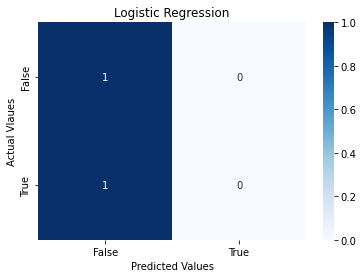

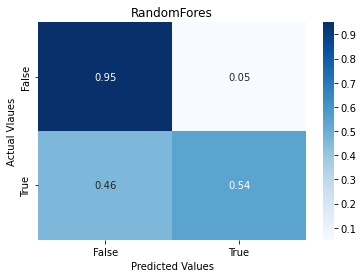

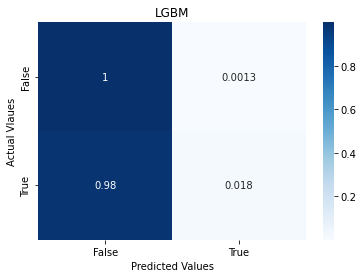

In [44]:
for i,result in enumerate(results_tuned):    
    cmn = confusion_matrix(y_test,result).astype('float') / confusion_matrix(y_test,result).sum(axis=1)[:, np.newaxis]
    _=sns.heatmap(cmn,annot=True,cmap='Blues')
    _.set_title(pipe_dict[i])
    _.set_xlabel('Predicted Values')
    _.set_ylabel('Actual Vlaues')
    _.xaxis.set_ticklabels(['False','True'])
    _.yaxis.set_ticklabels(['False','True'])
    plt.show()

Lastly, ROC-AUC graphs are plotted for different baseline models.

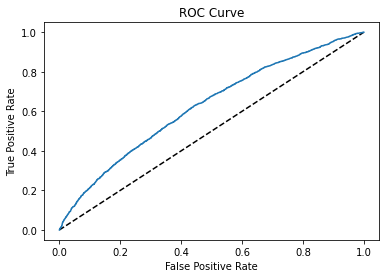

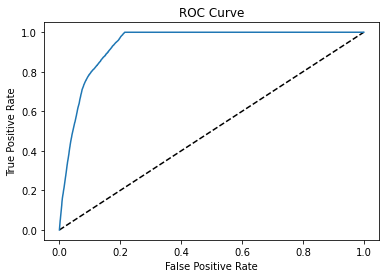

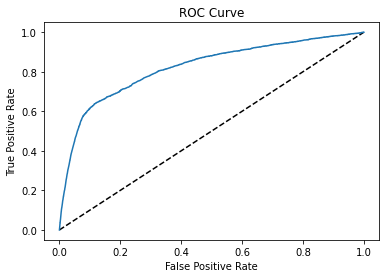

In [100]:
for i,result in enumerate(best_result):
    y_scores=result.predict_proba(X_test)[:,1]
    f_lr,t_lr,_=roc_curve(y_test,y_scores)
    roc_auc_LR=auc(f_lr,t_lr)
    round(roc_auc_LR,2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(f_lr, t_lr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(pipe_dict[i],'ROC Curve')
    plt.show()

<font size="5"> Conclusion

In conclusion, the baseline models performed really well by looking at the accuracy score since they were all above 85 percenet. However, once we look at the confusion matrix of each models, Logistic Regression and LightGBM Models' precision, recall, and f-1 score on predicting 'Risk' value are very poor. It is due to imbalanced classification since there are only about 12 percent of population with risk on getting loans. Therefore in the future notebook, different resampling techinques must be used to deal with the imbalanced classification. 